In [1]:
import pandas as pd
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt

In [12]:
csv_path = Path(r'/home/user/Documents/DTU/Fall_23/Advanced_dl_for_cv/doofLearning/data/raw/archive/Food Ingredients and Recipe Dataset with Image Name Mapping.csv')
images_path = Path(r'/home/user/Documents/DTU/Fall_23/Advanced_dl_for_cv/doofLearning/data/raw/archive/Food Images/Food Images')

In [13]:
recipes_df = pd.read_csv(csv_path, index_col=0)

In [14]:
recipes_df.head(5)

,Title,Ingredients,Instructions,Image_Name,Cleaned_Ingredients
0,Miso-Butter Roast Chicken With Acorn Squash Pa...,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...","Pat chicken dry with paper towels, season all ...",miso-butter-roast-chicken-acorn-squash-panzanella,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher..."
1,Crispy Salt and Pepper Potatoes,"['2 large egg whites', '1 pound new potatoes (...",Preheat oven to 400°F and line a rimmed baking...,crispy-salt-and-pepper-potatoes-dan-kluger,"['2 large egg whites', '1 pound new potatoes (..."
2,Thanksgiving Mac and Cheese,"['1 cup evaporated milk', '1 cup whole milk', ...",Place a rack in middle of oven; preheat to 400...,thanksgiving-mac-and-cheese-erick-williams,"['1 cup evaporated milk', '1 cup whole milk', ..."
3,Italian Sausage and Bread Stuffing,"['1 (¾- to 1-pound) round Italian loaf, cut in...",Preheat oven to 350°F with rack in middle. Gen...,italian-sausage-and-bread-stuffing-240559,"['1 (¾- to 1-pound) round Italian loaf, cut in..."
4,Newton's Law,"['1 teaspoon dark brown sugar', '1 teaspoon ho...",Stir together brown sugar and hot water in a c...,newtons-law-apple-bourbon-cocktail,"['1 teaspoon dark brown sugar', '1 teaspoon ho..."


In [15]:
idx = 0

row = recipes_df.iloc[idx]

title = row.Title
ingredients = row.Cleaned_Ingredients
dirty_ingredients = row.Ingredients
instructions = row.Instructions
img_name = row.Image_Name


In [16]:
print(title)
print(ingredients)
print(instructions)
print(img_name)

Miso-Butter Roast Chicken With Acorn Squash Panzanella
['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher salt, divided, plus more', '2 small acorn squash (about 3 lb. total)', '2 Tbsp. finely chopped sage', '1 Tbsp. finely chopped rosemary', '6 Tbsp. unsalted butter, melted, plus 3 Tbsp. room temperature', '¼ tsp. ground allspice', 'Pinch of crushed red pepper flakes', 'Freshly ground black pepper', '⅓ loaf good-quality sturdy white bread, torn into 1" pieces (about 2½ cups)', '2 medium apples (such as Gala or Pink Lady; about 14 oz. total), cored, cut into 1" pieces', '2 Tbsp. extra-virgin olive oil', '½ small red onion, thinly sliced', '3 Tbsp. apple cider vinegar', '1 Tbsp. white miso', '¼ cup all-purpose flour', '2 Tbsp. unsalted butter, room temperature', '¼ cup dry white wine', '2 cups unsalted chicken broth', '2 tsp. white miso', 'Kosher salt', 'freshly ground pepper']
Pat chicken dry with paper towels, season all over with 2 tsp. salt, and tie legs together with kitchen twine. Let

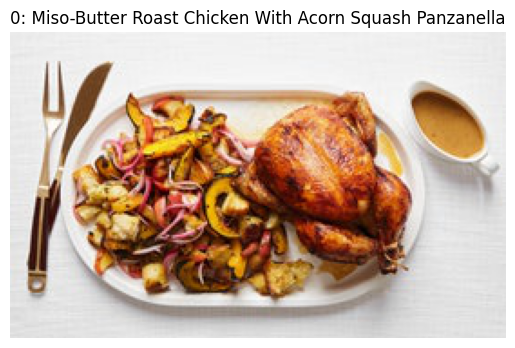

In [25]:
img_path = images_path / (img_name+'.jpg')
img = Image.open(img_path)
plt.imshow(img)
plt.title(f"{idx}: {title}")
plt.axis('off')
plt.show()

The square brackets in the ingredients is actually a character:

In [11]:
type(ingredients)

str

What is the difference between cleaned and not-cleaned ingredient columns?

In [10]:
print(ingredients)
print(dirty_ingredients)

['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher salt, divided, plus more', '2 small acorn squash (about 3 lb. total)', '2 Tbsp. finely chopped sage', '1 Tbsp. finely chopped rosemary', '6 Tbsp. unsalted butter, melted, plus 3 Tbsp. room temperature', '¼ tsp. ground allspice', 'Pinch of crushed red pepper flakes', 'Freshly ground black pepper', '⅓ loaf good-quality sturdy white bread, torn into 1" pieces (about 2½ cups)', '2 medium apples (such as Gala or Pink Lady; about 14 oz. total), cored, cut into 1" pieces', '2 Tbsp. extra-virgin olive oil', '½ small red onion, thinly sliced', '3 Tbsp. apple cider vinegar', '1 Tbsp. white miso', '¼ cup all-purpose flour', '2 Tbsp. unsalted butter, room temperature', '¼ cup dry white wine', '2 cups unsalted chicken broth', '2 tsp. white miso', 'Kosher salt', 'freshly ground pepper']
['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher salt, divided, plus more', '2 small acorn squash (about 3 lb. total)', '2 Tbsp. finely chopped sage', '1 Tbsp. finely chop

In [11]:
dirty_ingredients==ingredients

False

Small differences. Some sentences in the dirty version are ot separated well. They look similar nonetheless. Maybe return later

Are there recipes that do not have corresponding images?

In [35]:
from PIL import Image

img_bad_idx = []
for i in range(len(recipes_df)):
    row = recipes_df.iloc[i]
    img_path = images_path / (row.Image_Name+'.jpg')
    try:
        Image.open(img_path)
    except FileNotFoundError:
        print(f"{i}: {row.Title}")
        img_bad_idx.append(i)

3441: "Burnt" Carrots and Parsnips
3641: "Bloody Mary" Tomato Toast with Celery and Horseradish
4117: Smoked Salmon Breakfast Salad with Crispbread
4124: Pork Chops with Carrots and Toasted Buckwheat
4126: Chickpea Pancakes with Leeks, Squash, and Yogurt
4129: Lentils with Cucumbers, Chard, and Poached Egg
4139: Hazelnut Butter and Coffee Meringues
4276: "Candy Corn" Pumpkin Blondies
4307: Radicchio, Shaved Fennel, and Pomegranate Salad
4331: Pumpkin Gruyère Gratin with Thyme
4339: Halibut Confit With Leeks, Coriander, and Lemon
4344: Fritto Misto
4352: Radicchio and Apple Salad with Parmesan Crisps
4354: Prosciutto, Watercress, and Fontina Toasties
4510: Rhubarb Spritzer
4564: Chickpea, Barley, and Feta Salad
4606: Fried Chicken
4660: Pistachio-Crusted Chicken with Carrot Raita
5498: BA's Ultimate Lobster Rolls
5617: Rhubarb Shortcakes
6679: "Candy Corn" Frozen Citrus Cream Pops
6781: Gourmet Live's First-Birthday Cake
7823: "Carbonnade à la Flamande" Short Ribs
8039: "Top Tier" Devil

In [36]:
print(len(img_bad_idx), 'recipes with bad image path')

30 recipes with bad image path


Will address this fact when building the processed dataset

There is also another thing: Some text fields might have bad formatting:

In [33]:
recipes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13501 entries, 0 to 13500
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Title                13496 non-null  object
 1   Ingredients          13501 non-null  object
 2   Instructions         13493 non-null  object
 3   Image_Name           13501 non-null  object
 4   Cleaned_Ingredients  13501 non-null  object
dtypes: object(5)
memory usage: 632.9+ KB


In [34]:
recipes_df.describe()

,Title,Ingredients,Instructions,Image_Name,Cleaned_Ingredients
count,13496,13501,13493,13501,13501
unique,13305,13473,13464,13472,13473
top,Potato Latkes,[],Place ingredients in blender in the order list...,#NAME?,['']
freq,5,12,5,30,12


Find bad titles, ingredients, instructions. The process is very similar to the images. Repeated since throwaway code in this notebook.

In [44]:
title_bad_idx = []
ingredients_bad_idx = []
instructions_bad_idx = []
for i in range(len(recipes_df)):
    row = recipes_df.iloc[i]
    if not row.Title:
        title_bad_idx.append(i)
    if not row.Cleaned_Ingredients or row.Cleaned_Ingredients=="['']":
        ingredients_bad_idx.append(i)
    if not row.Instructions:
        ingredients_bad_idx.append(i)

In [45]:
title_bad_idx, ingredients_bad_idx, instructions_bad_idx

([],
 [5606, 5699, 7058, 7863, 8059, 9350, 9636, 11221, 12373, 12378, 12818, 12829],
 [])